In [2]:
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline    
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
import re
import nltk
import warnings
import numpy as np 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd

data = pd.read_csv('spam.csv', encoding='ISO-8859-1') 
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
print(data['v2'].head())

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object


In [12]:
data = data.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
data.rename(columns= { 'v1' : 'class' , 'v2' : 'message'}, inplace= True)
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.duplicated().sum()

np.int64(403)

In [8]:
data.drop_duplicates(inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_10576\2421108084.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='class', palette='Greens')


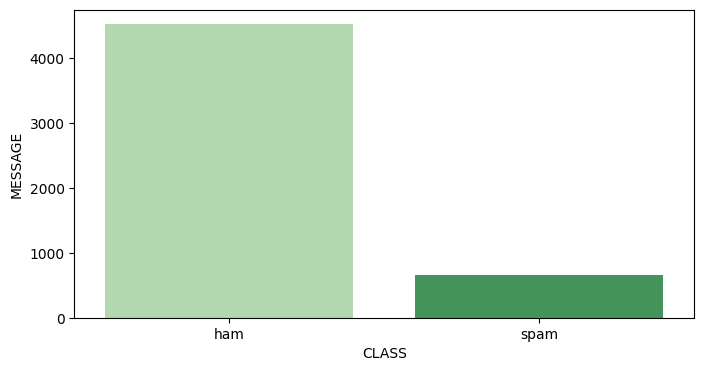

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='class', palette='Greens')
plt.xlabel("CLASS")
plt.ylabel("MESSAGE")
plt.show()

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
nltk.data.find('tokenizers/punkt')


FileSystemPathPointer('C:\\Users\\DELL\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt')

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_

True

In [6]:
print(nltk.data.path)


['C:\\Users\\DELL/nltk_data', 'C:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'C:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'C:\\Users\\DELL\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\DELL\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [7]:
nltk.data.path.append('path_to_your_nltk_data_directory')


In [13]:
data['No of Chars'] = data['message'].apply(len)
data['No of Sentences'] = data['message'].apply(lambda corpus: nltk.sent_tokenize(corpus)).apply(len)
data['No of Words'] = data['message'].apply(lambda document: nltk.word_tokenize(document)).apply(len)

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No of Chars,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No of Sentences,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0
No of Words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0


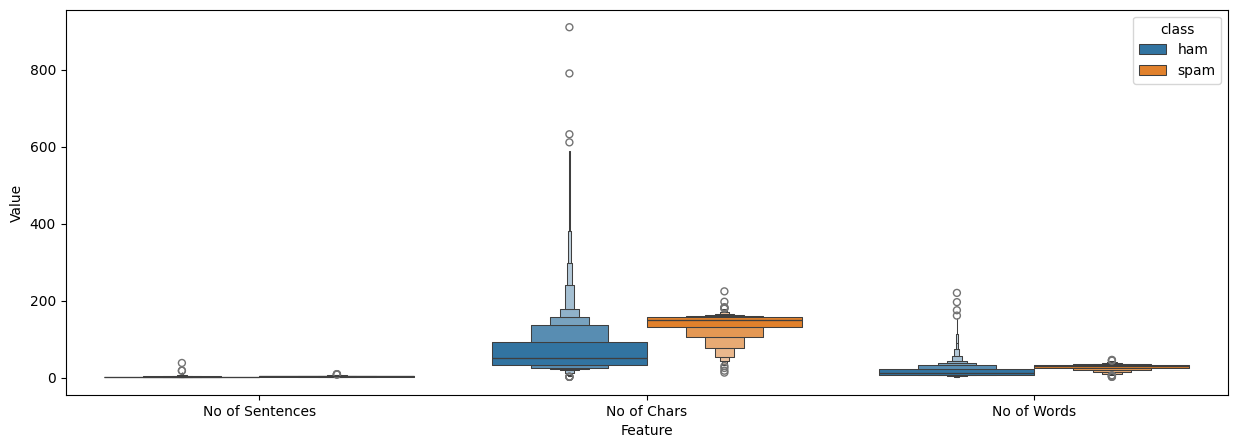

In [19]:
melted_df = data.melt(id_vars='class', value_vars=['No of Sentences', 'No of Chars', 'No of Words'], var_name='Feature', value_name='Value')

plt.figure(figsize=(15,5))
sns.boxenplot(x='Feature', y='Value', data=melted_df, hue='class')
plt.show()

In [23]:
def data_cleaning(text):
    text = re.sub('[^a-zA-Z]', ' ', text) 
    text = str.lower(text) 
    text = text.split()    
    text = ' '.join(text)  
    return text


# applying data cleaning and creating new feature  
data['Clean Text'] = data['message'].apply(data_cleaning)

In [26]:
data['Tokenized Text'] = data['Clean Text'].apply(lambda document: nltk.word_tokenize(document))

In [27]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
def clean_message(message):
    message = re.sub("[^A-Za-z]", " ", message) 
    message = message.lower() 
    message = message.split() 
    stemmer = PorterStemmer()          
    message = [stemmer.stem(word) for word in message if word not in set(stopwords.words("english"))] 
    message = " ".join(message) 
    return message

In [28]:
message = data.message[0]
print(message)

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [30]:
message = clean_message(message)
print(message)

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [31]:
messages = []
for i in range(0, len(data)):
    message = clean_message(data.message[i])
    messages.append(message)

In [32]:
data = data.drop(["message"],axis=1)
data['messages'] = messages
data.head()

,class,No of Chars,No of Sentences,No of Words,Clean Text,Tokenized Text,messages
0,ham,111,2,24,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",go jurong point crazi avail bugi n great world...
1,ham,29,2,8,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,spam,155,2,37,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...",free entri wkli comp win fa cup final tkt st m...
3,ham,49,1,13,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...",u dun say earli hor u c alreadi say
4,ham,61,1,15,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...",nah think goe usf live around though


In [33]:
y = data["class"].values
x = data["messages"].values

In [35]:
from sklearn.model_selection import train_test_split
#splitting the data in training and test set
xtrain , xtest , ytrain , ytest = train_test_split(x,y, test_size = 0.2, random_state = 42)
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

(4457,) (4457,) (1115,) (1115,)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english',max_df=0.5)

#fitting train data and then transforming it to count matrix#fitting 
x_train = vect.fit_transform(xtrain)
#print(x_train)

#transforming the test data into the count matrix initiated for train data
x_test = vect.transform(xtest)

# importing naive bayes algorithm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#fitting the model into train data 
nb.fit(x_train,ytrain)

#predicting the model on train and test data
y_pred_test = nb.predict(x_test)
y_pred_train = nb.predict(x_train)

#checking accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred_test)*100)

#Making Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred_test)
print(cm)


96.50224215246637
[[965   0]
 [ 39 111]]


In [37]:
#Testing the Model

In [38]:
new_text = pd.Series('WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. valid 12 hours')
new_text_transform = vect.transform(new_text)
print(" The email is a" ,nb.predict(new_text_transform))

 The email is a ['spam']
